# DATA COLLECTION

In [1]:
# UNIVARIENT LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
data=pd.read_csv('house_prices_updated.csv')
data.head(10)

,SIZE,#ROOMS,PRICE
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


In [3]:
data.shape

(46, 3)

# DATA ANALYSIS

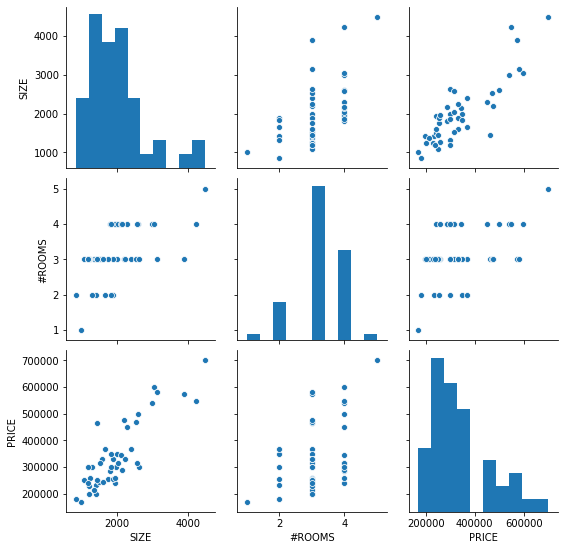

In [4]:
sb.pairplot(data)

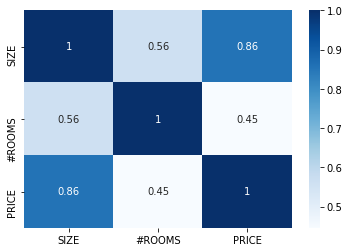

In [5]:
sb.heatmap(data.corr(),cmap='Blues',annot=True)

Text(0.5, 1.0, 'TARINING SET')

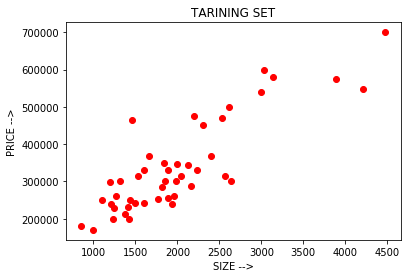

In [6]:
plt.scatter(data.SIZE,data.PRICE,color='red')
plt.xlabel('SIZE -->')
plt.ylabel('PRICE -->')
plt.title('TARINING SET')

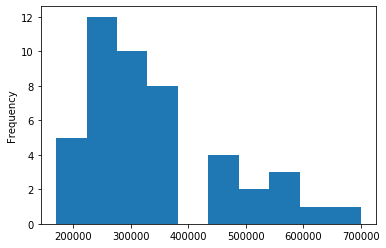

In [7]:
data['PRICE'].plot.hist()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SIZE    46 non-null     int64
 1   #ROOMS  46 non-null     int64
 2   PRICE   46 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


# DATA WRANGLING

In [9]:
data.isnull()


,SIZE,#ROOMS,PRICE
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [10]:
data.isnull().sum()

SIZE      0
#ROOMS    0
PRICE     0
dtype: int64

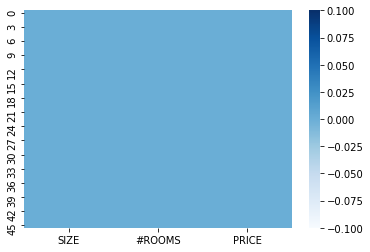

In [11]:
sb.heatmap(data.isnull(),cmap='Blues')

In [12]:
data=data.drop(columns=['#ROOMS'])
data.head()


,SIZE,PRICE
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900


# TRAIN AND TEST DATA

In [13]:
#Using MODERN METHOD
x=np.asanyarray(data[['SIZE']])
y=np.asanyarray(data[['PRICE']])


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [22]:
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_,lr.coef_,sep=' ')

[67061.83872877] [[138.5090981]]


In [23]:
predict=lr.predict(x_test)
print(y_test,predict,sep='\n')

[[249900]
 [299000]
 [232000]
 [242900]
 [539900]
 [299900]
 [573900]
 [314900]
 [249900]
 [259900]]
[[266099.41269213]
 [233272.75644348]
 [263190.72163212]
 [289230.4320741 ]
 [482589.13301554]
 [432310.33040684]
 [605862.23032062]
 [349620.39884377]
 [219421.84663392]
 [338816.68919232]]


# EVALUATION

In [24]:
mean_absolute_error(y_test,predict)


52524.64790689703

In [25]:
mean_squared_error(y_test,predict)

3790274457.0795517

In [26]:
r2_score(y_test,predict)

0.7301023994908211

Text(0.5, 1.0, 'ML MODEL')

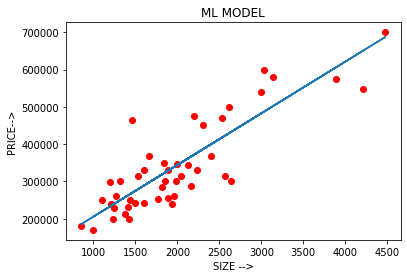

In [27]:
theta0=lr.intercept_[0]
theta1=lr.coef_[0][0]
h=theta0+theta1*x
plt.scatter(x,y,color='red')
plt.plot(x,h)
plt.xlabel('SIZE -->')
plt.ylabel('PRICE-->')
plt.title('ML MODEL')